In [1]:
#importing data into google colab from kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikkieswaran97","key":"bfdcd1e3eaedd736678402756ec11c81"}'}

In [2]:
#importing data into google colab from kaggle

!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

In [3]:
#importing data into google colab from kaggle

!pip install kaggle

!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 86% 104M/121M [00:00<00:00, 238MB/s] 
100% 121M/121M [00:00<00:00, 246MB/s]


In [4]:
#importing data into google colab from kaggle

!ls

drive  face-expression-recognition-dataset.zip	kaggle.json  sample_data


In [5]:
#importing data into google colab from kaggle

import zipfile

file_name=("face-expression-recognition-dataset.zip") 
with zipfile.ZipFile(file_name,'r') as zip: 
			zip.extractall() 
			print("done") 


done


In [6]:
#importing necessary libraries

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Location of Training data and Test data

train_path="/content/images/images/train"
test_path="/content/images/images/validation"

In [8]:
#Getting number of categories 

no_of_categories = len(glob("/content/images/images/train/*"))

In [9]:
no_of_categories

7

In [10]:
#Defining the input size

IMAGE_SIZE = [224, 224]

In [11]:
#Transfer learning using VGG16 with weights from imagenet 

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [12]:
#Makeing trainable = False 

for layer in vgg.layers:
  layer.trainable = False

In [13]:
#Adding flatten layer 

x = Flatten()(vgg.output)

In [15]:
#Adding Dense layer for prediction

prediction = Dense(no_of_categories, activation='softmax')(x)

In [16]:
#Creating the model

model=Model(inputs=vgg.input, outputs=prediction)

In [17]:
#Getting the summary of the model

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [18]:
#Using Adam as Optimizer , Categorical_crossentropy as loss and accuracy as metrics  

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
#DataAugmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [20]:
#DataAugmentation

test_datagen = ImageDataGenerator(rescale = 1./255)


In [21]:
#Getting training_set ready

training_set = train_datagen.flow_from_directory('/content/images/images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 28821 images belonging to 7 classes.


In [22]:
#Getting test_set ready

test_set = test_datagen.flow_from_directory('/content/images/images/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7066 images belonging to 7 classes.


In [23]:
model = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
901/901 [==============================] - 336s 372ms/step - loss: 1.6101 - accuracy: 0.4155 - val_loss: 1.3662 - val_accuracy: 0.4864
Epoch 2/20
901/901 [==============================] - 337s 374ms/step - loss: 1.4203 - accuracy: 0.4819 - val_loss: 1.4918 - val_accuracy: 0.4693
Epoch 3/20
901/901 [==============================] - 343s 380ms/step - loss: 1.3915 - accuracy: 0.4964 - val_loss: 1.2854 - val_accuracy: 0.5334
Epoch 4/20
901/901 [==============================] - 349s 388ms/step - loss: 1.3292 - accuracy: 0.5177 - val_loss: 1.3004 - val_accuracy: 0.5197
Epoch 5/20
901/901 [==============================] - 351s 389ms/step - loss: 1.3330 - accuracy: 0.5210 - val_loss: 1.5311 - val_accuracy: 0.4742
Epoch 6/20
901/901 [==============================] - 353s 392ms/step - loss: 1.2753 - accuracy: 0.5414 - val_loss: 1.2858 - val_accuracy: 0.5342
Epoch 7/20
901/901 [============================

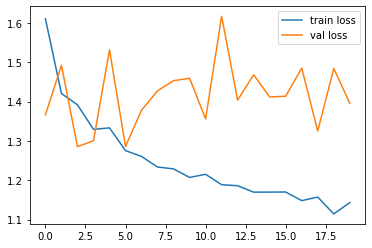

In [24]:
#Plotting the  loss

plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()

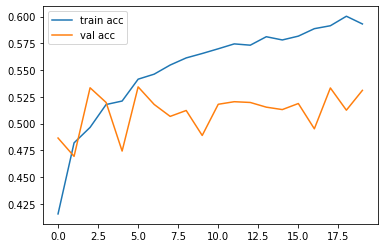

In [27]:
#Plotting the accuracies

plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()